# Data Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Traffic.csv')
df.head()

Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal

In [4]:
df.describe()

Date     CarCount    BikeCount     BusCount   TruckCount  \
count  2976.000000  2976.000000  2976.000000  2976.000000  2976.000000   
mean     16.000000    68.696573    14.917339    15.279570    15.324933   
std       8.945775    45.850693    12.847518    14.341986    10.603833   
min       1.000000     6.000000     0.000000     0.000000     0.000000   
25%       8.000000    19.000000     5.000000     1.000000     6.000000   
50%      16.000000    64.000000    12.000000    12.000000    14.000000   
75%      24.000000   107.000000    22.000000    25.000000    23.000000   
max      31.000000   180.000000    70.000000    50.000000    40.000000   

             Total  
count  2976.000000  
mean    114.218414  
std      60.190627  
min      21.000000  
25%      55.000000  
50%     109.000000  
75%     164.000000  
max     279.000000

In [5]:
df.shape

(2976, 9)

In [6]:
df_1d = df.head(96)
df.head()

Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal

In [7]:
print(df_1d.columns)


Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')


In [8]:
df_1d.columns = df_1d.columns.str.strip()


In [9]:
print(df_1d.head())


          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  


# Model Evaluation


In [10]:
plt.figure(figsize=(6,3))  

sns.set_theme(style="whitegrid", palette="muted")
sns.set_context('notebook', font_scale = 1.0, rc={"lines.linewidth": 1.5})

plt.rcParams['font.family']='cursive'
plt.rcParams['font.stretch']='condensed'
plt.rcParams['font.style']='italic'
plt.rcParams['font.weight']='heavy'
plt.rcParams['font.size']=15

plt.rcParams['figure.dpi'] = 120  

NameError: name 'sns' is not defined

<Figure size 600x300 with 0 Axes>

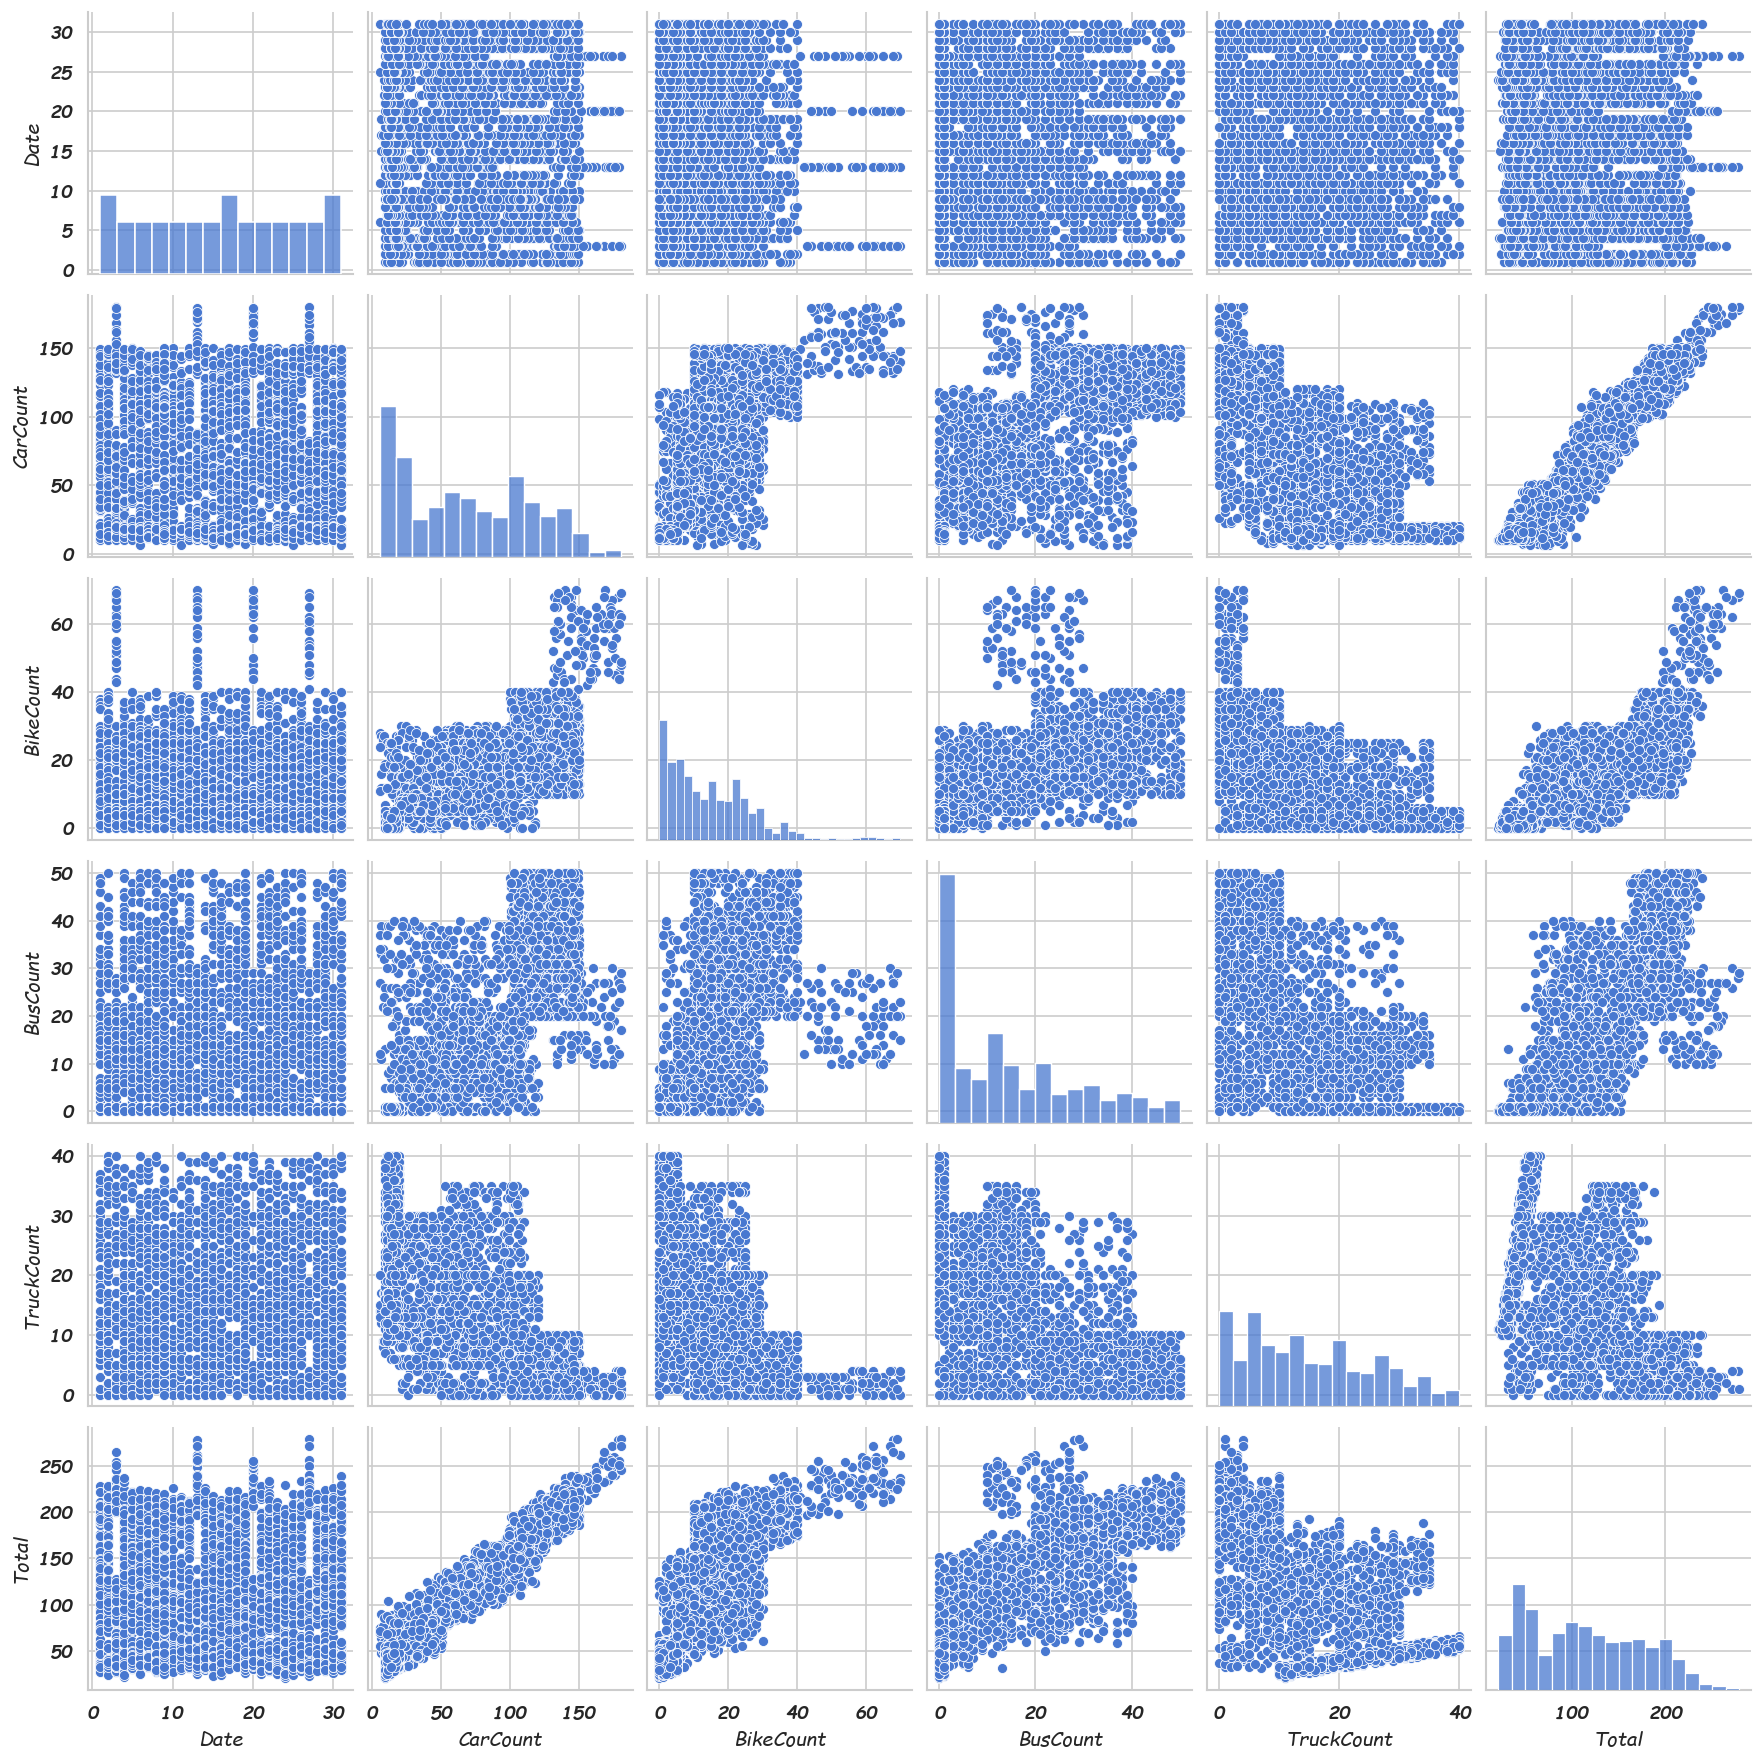

In [ ]:
# Plot the numeric features
numeric_columns = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
sns.pairplot(df[numeric_columns])
plt.show()

c:\Users\Joydeep Saha\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) Comic Sans MS.
  fig.canvas.print_figure(bytes_io, **kw)


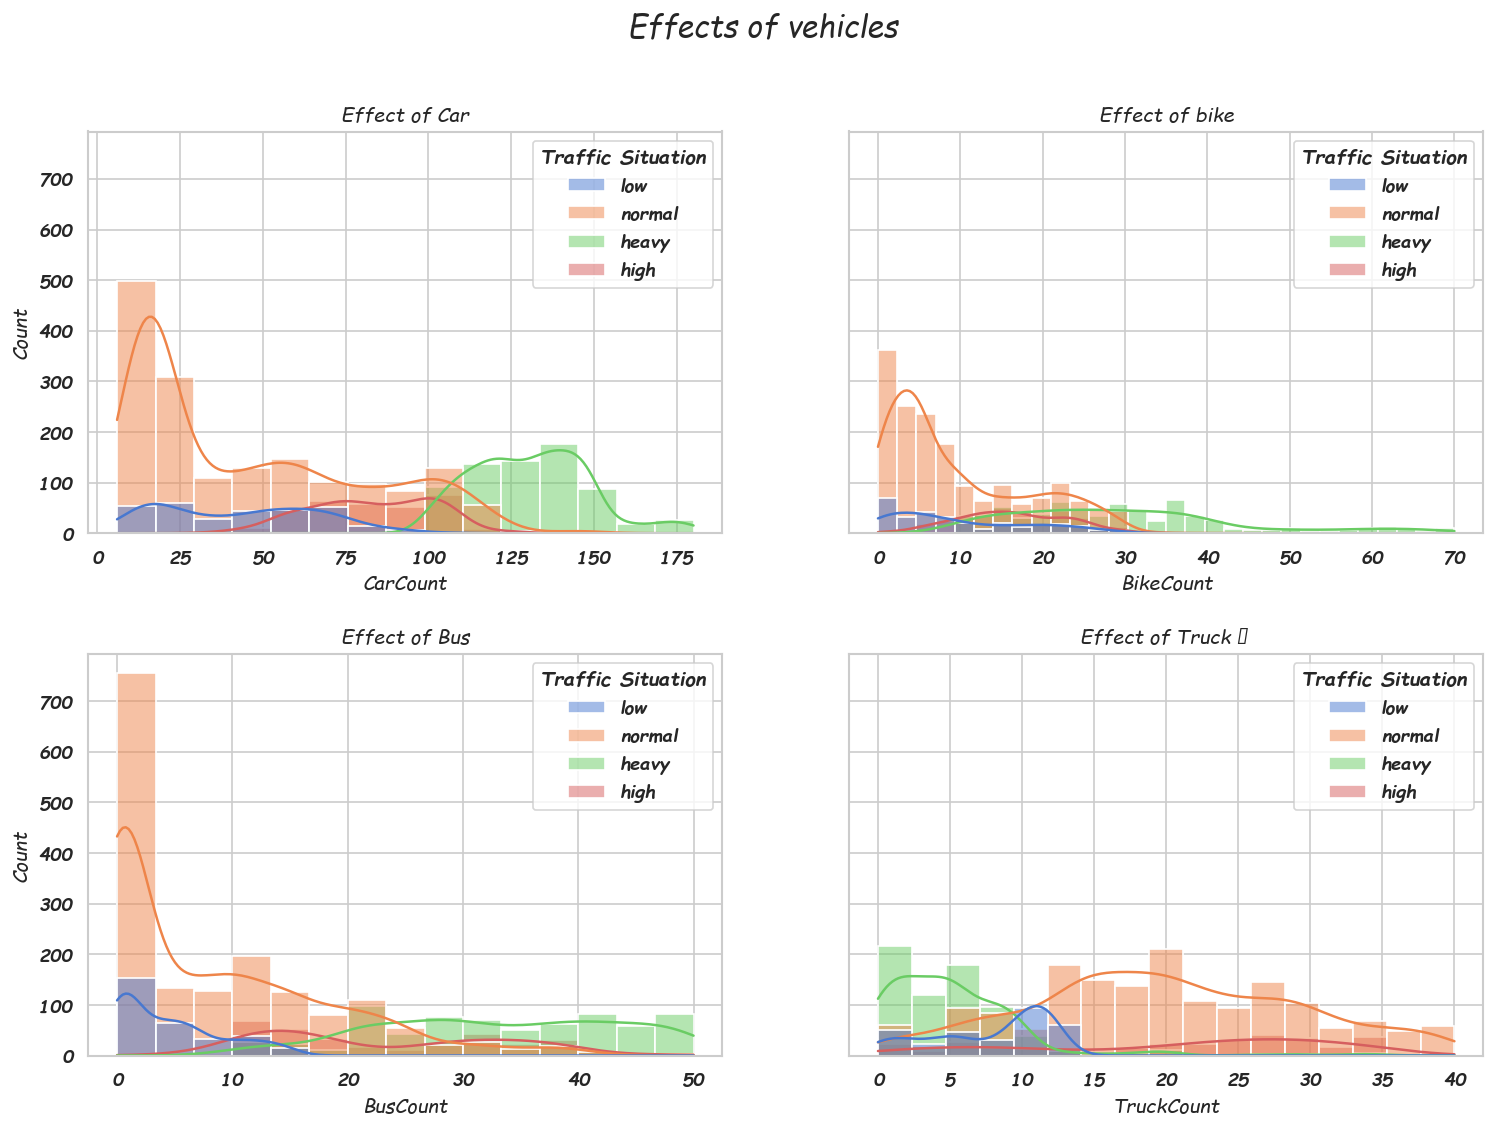

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Effects of vehicles')

sns.histplot(df,x='CarCount',hue='Traffic Situation',kde=True,ax=axes[0,0])
axes[0,0].set_title('Effect of Car')

sns.histplot(df,x='BikeCount',hue='Traffic Situation',kde=True,ax=axes[0,1])
axes[0,1].set_title('Effect of bike')

sns.histplot(df,x='BusCount',hue='Traffic Situation',kde=True,ax=axes[1,0])
axes[1,0].set_title('Effect of Bus')

sns.histplot(df,x='TruckCount',hue='Traffic Situation',kde=True,ax=axes[1,1])
axes[1,1].set_title('Effect of Truck ðŸšš ')
plt.subplots_adjust(hspace=0.3)
plt.show()

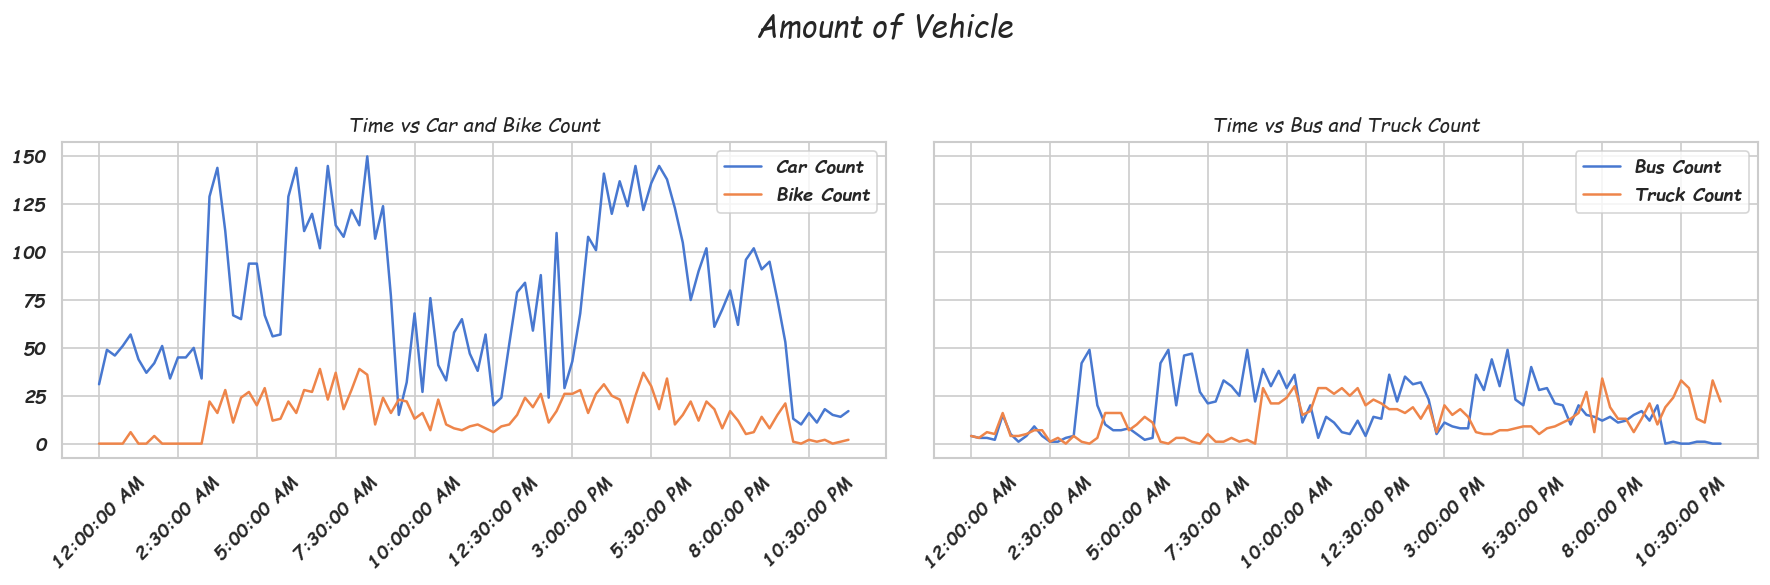

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Amount of Vehicle')

# Plot for Car and Bike count
axes[0].plot(df_1d['Time'], df_1d['CarCount'], label='Car Count')
axes[0].plot(df_1d['Time'], df_1d['BikeCount'], label='Bike Count')
axes[0].set_title('Time vs Car and Bike Count')
axes[0].legend()
axes[0].set_xticks(df_1d['Time'][::10])
axes[0].tick_params(axis='x', rotation=45)

# Plot for Bus and Truck count
axes[1].plot(df_1d['Time'], df_1d['BusCount'], label='Bus Count')
axes[1].plot(df_1d['Time'], df_1d['TruckCount'], label='Truck Count')
axes[1].set_title('Time vs Bus and Truck Count')
axes[1].legend()
axes[1].set_xticks(df_1d['Time'][::10])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
df[df['Time'] == '9:00:00 AM'].head(7)

Time  Date Day of the week  CarCount  BikeCount  BusCount  \
36   9:00:00 AM    10         Tuesday       124         24        22   
132  9:00:00 AM    11       Wednesday       125         28        36   
228  9:00:00 AM    12        Thursday       144         30        37   
324  9:00:00 AM    13          Friday        53         19         1   
420  9:00:00 AM    14        Saturday       139         15        21   
516  9:00:00 AM    15          Sunday       113         35        48   
612  9:00:00 AM    16          Monday       117         11        45   

     TruckCount  Total Traffic Situation  
36            0    170             heavy  
132           0    189             heavy  
228           1    212             heavy  
324          10     83               low  
420           3    178             heavy  
516           3    199             heavy  
612           0    173             heavy

In [ ]:
df_1w = df[df['Time'] == '9:00:00 AM'].head(7)
df_1w.head()

Time  Date Day of the week  CarCount  BikeCount  BusCount  \
36   9:00:00 AM    10         Tuesday       124         24        22   
132  9:00:00 AM    11       Wednesday       125         28        36   
228  9:00:00 AM    12        Thursday       144         30        37   
324  9:00:00 AM    13          Friday        53         19         1   
420  9:00:00 AM    14        Saturday       139         15        21   

     TruckCount  Total Traffic Situation  
36            0    170             heavy  
132           0    189             heavy  
228           1    212             heavy  
324          10     83               low  
420           3    178             heavy

# Visualization

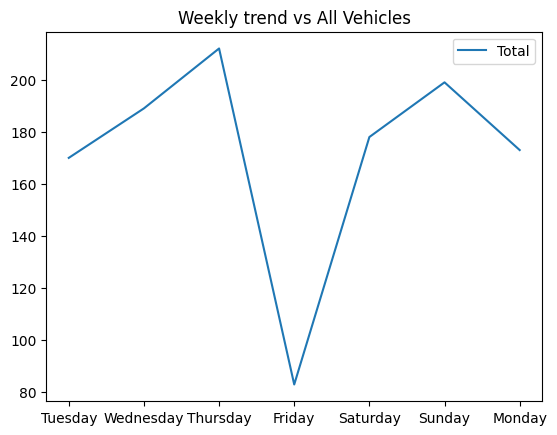

In [ ]:
plt.plot(df_1w['Day of the week'], df_1w['Total'])
plt.title('Weekly trend vs All Vehicles')
plt.legend(['Total'])
plt.show()

In [ ]:
df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

In [ ]:
df['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

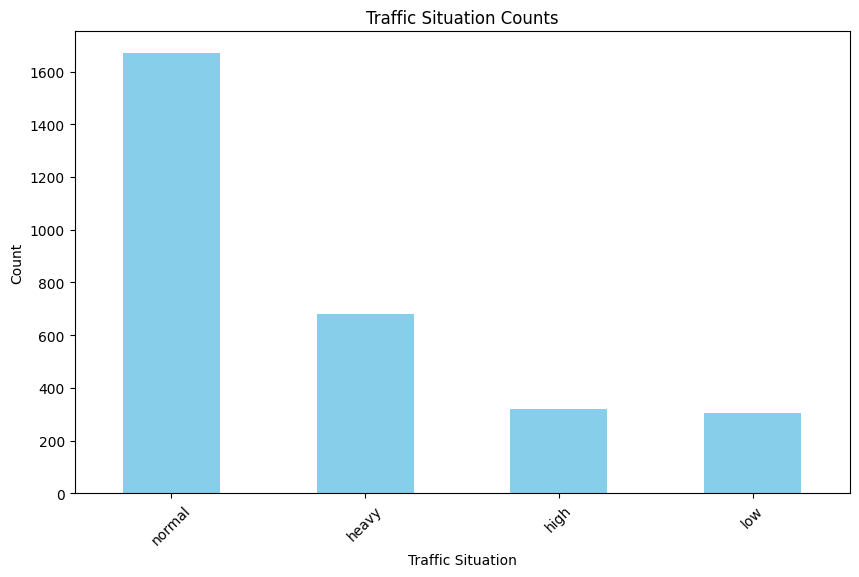

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
df['Traffic Situation'].value_counts().plot.bar(color='skyblue')


plt.title('Traffic Situation Counts')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.xticks(rotation=45)


plt.show()


In [ ]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [ ]:
df.drop(['Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount'],axis=1,inplace=True)

In [ ]:
df.isna().sum()

Time                 0
Date                 0
Total                0
Traffic Situation    0
dtype: int64

In [ ]:
from datetime import datetime

def time2sec(time):

    time_obj = datetime.strptime(time, '%I:%M:%S %p')
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second



In [ ]:
df['Time'] = df['Time'].apply(lambda x: time2sec(x))
df.head()

Time  Date  Total Traffic Situation
0     0    10     39               low
1   900    10     55               low
2  1800    10     55               low
3  2700    10     58               low
4  3600    10     94            normal

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])


df.head()

Time  Date  Total  Traffic Situation
0     0    10     39                  2
1   900    10     55                  2
2  1800    10     55                  2
3  2700    10     58                  2
4  3600    10     94                  3

In [ ]:
df.head()

Time  Date  Total  Traffic Situation
0     0    10     39                  2
1   900    10     55                  2
2  1800    10     55                  2
3  2700    10     58                  2
4  3600    10     94                  3

In [ ]:

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


print(label_mapping)

{'heavy': np.int64(0), 'high': np.int64(1), 'low': np.int64(2), 'normal': np.int64(3)}


# Model Training


In [11]:
X,y = df.drop('Traffic Situation',axis=1),df['Traffic Situation']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape,y_test.shape

((2380, 3), (596,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
rfc.score(X_test,y_test)  

0.8338926174496645

In [ ]:
from sklearn.model_selection import GridSearchCV  # type: ignore
from sklearn.ensemble import RandomForestClassifier  # type: ignore

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] 
}


# Create the RandomForestClassifier
rfc = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8491596638655462


In [ ]:
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.8399159663865546


In [ ]:
rfc = RandomForestClassifier(max_depth= None, max_features= 'sqrt', min_samples_leaf=1, min_samples_split= 2, n_estimators= 10)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test) 

0.8305369127516778

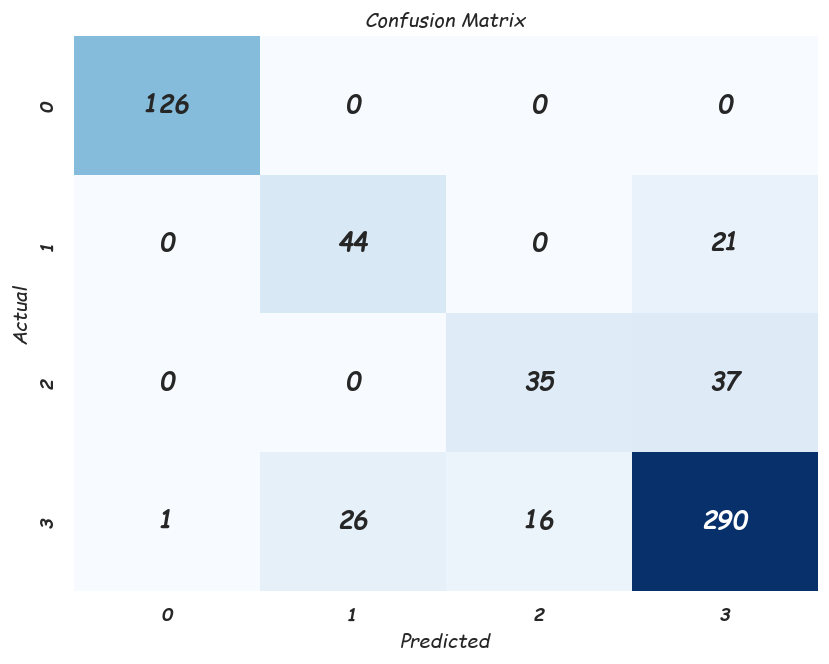

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, rfc.predict(X_test))


plt.figure(figsize=(8, 6))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

# THANK YOU
